In [1]:
import numpy as np
import pandas as pd
# 전체적인 환경설정 용도
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family = font_name)

import sklearn

mpl.rcParams['axes.unicode_minus'] = False

# 훈련용과 테스트용 데이터를 나누어준다.
from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn

from sklearn.neighbors import KNeighborsClassifier

import sklearn.datasets as datasets
import sklearn.metrics

## Naive Bayes
    - 확률을 이용한 알고리즘
    - 선형모델과 유사함.(LogisticRegression, LinearSVC...)
    - 훈련속도가 빠르지만 일반화 성능이 조금 뒤쳐진다.
    - 연속적인 데이터 : Gaussian 
    - 이산 데이터  : BernoulliNB, MultinomialNB
    - alpha 파라미터를 통해 복잡도 조절가능

In [15]:
# GaussianNB
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)


In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
model = GaussianNB().fit(X_train, y_train)

In [18]:
pred = model.predict(X_test)

In [19]:
print(sklearn.metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      1.00      0.94         8
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [2]:
# Multinomial NB

review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)

df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [6]:
# type 숫자로 변경
df['label'] = df['type'].map({'positive' :1,'negative' : 0})

df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [7]:
# 데이터 분리(훈련데이터와 정답데이터)
df_x = df['movie_review']
df_y = df['label']

In [11]:
# 다항분포 : 입력데이터는 고정된 크기의 벡터로써 각각의 인덱스는 단어의 빈도수로 구분이 되어있어야함.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

cv = CountVectorizer()
X_train_cv = cv.fit_transform(df_x)
encoded_input = X_train_cv.toarray()

encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [12]:
# 숫자로 된 데이터 다시 문자로 변경해보기
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [13]:
# 현재 cv 안에 있는 모든 단어 출력
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [16]:
# MultinomiaNB 로 훈련시키기

mnb = MultinomialNB()

y_train = df_y.astype('int')
mnb.fit(X_train_cv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
type(df_y)

pandas.core.series.Series

In [17]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df['label'] = test_df['type'].map({'positive' : 1, 'negative' : 0})
test_x = test_df['movie_review']
test_y = test_df['label']

In [18]:
# 테스트 데이터 숫자로 변경
x_test_cv = cv.transform(test_x)

x_test_cv

<10x37 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [21]:
# 학습시키기
pred = mnb.predict(x_test_cv)
pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [22]:
accuracy_score(test_y, pred)

1.0

In [23]:
# 베르누이 NB : 스팸메일 구분
from sklearn.naive_bayes import BernoulliNB

In [24]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]
df = pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [25]:
df['label'] = df['spam'].map({True : 1, False :0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [26]:
df_x = df['email title']
df_y = df['label']

In [29]:
# 입력데이터는 고정된 크기의 벡터로써 0과 1로 구분된 데이터여야함.
# binary = 사건이 일어날 확률 (1), 일어나지 않을 확률 (0)으로 구분해줌
cv = CountVectorizer(binary=True)
x_train_cv = cv.fit_transform(df_x)
encoded_input = x_train_cv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [33]:
cv.inverse_transform(encoded_input[0])
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [34]:
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_train_cv, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [37]:
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True : 1, False : 0})
test_x = test_df['email title']
test_y = test_df['label']

x_test_cv = cv.transform(test_x)

In [39]:
pred = bnb.predict(x_test_cv)
pred

array([1, 1, 1, 0, 0, 1])

In [40]:
accuracy_score(test_y, pred)

0.8333333333333334

# 비지도 학습 : K-means

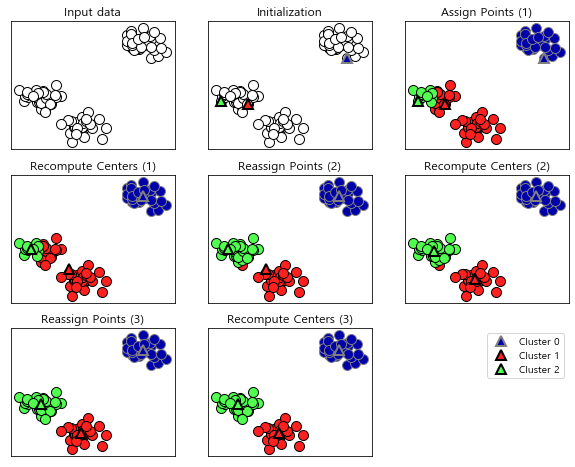

In [41]:
mglearn.plots.plot_kmeans_algorithm()

In [42]:
from sklearn.cluster import KMeans

In [52]:
X,y = sklearn.datasets.make_blobs()

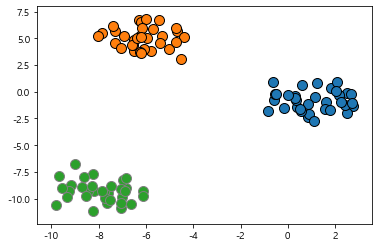

In [60]:
mglearn.discrete_scatter(X[:,0], X[:,1],y, markers = 'o')

In [67]:
# 비지도 학습의 경우 답 없이 데이터만 넘겨줌, 많은 양의 데이터가 필요함
km = KMeans(n_clusters=3).fit(X)

In [68]:
# 모델이 찾은 정답
lbl = km.labels_

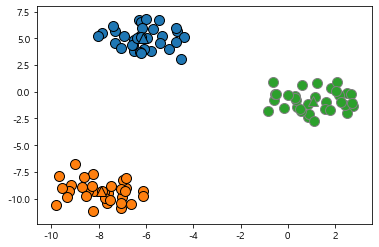

In [70]:
# 모델이 찾은 정답으로 그래프 그리기
mglearn.discrete_scatter(X[:,0], X[:,1],lbl, markers = 'o')
# 중심점 표시하기
mglearn.discrete_scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],[0,1,2], markers = '^')

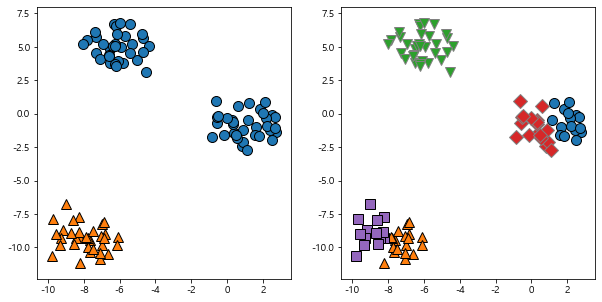

In [75]:
# 군집이 2개일때와 5개 일때 그래프 그려보기!
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

idx = 0
for k in [2,5]:
    km = KMeans(n_clusters=k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:,0], X[:,1],lbl, ax = axes[idx])
    idx +=1
    

In [76]:
KMeans().fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [113]:
# iris 샘플
iris = sklearn.datasets.load_iris()

X = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns = ['target'])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

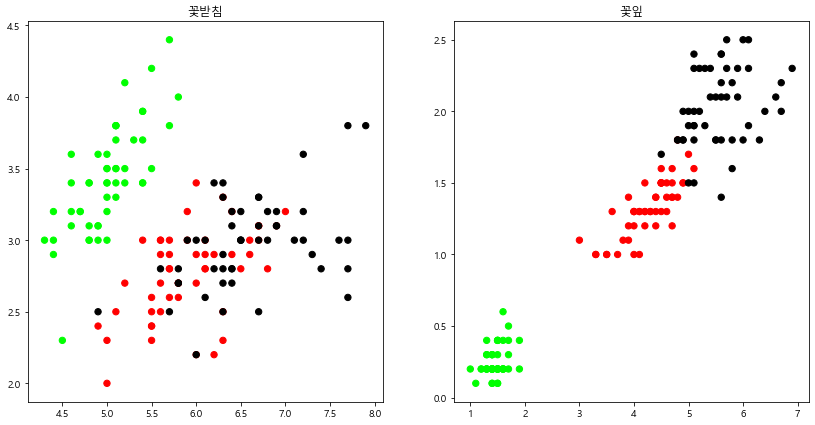

In [107]:
plt.figure(figsize = (14,7))
colormap = np.array(['lime', 'red','black'])


plt.subplot(1,2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c = colormap[y.target], s = 40)
plt.title('꽃받침')


plt.subplot(1,2, 2)
plt.scatter(X.petal_length, X.petal_width, c = colormap[y.target], s = 40)
plt.title('꽃잎')

In [114]:
model = KMeans(n_clusters=3).fit(X)

In [115]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '결과')

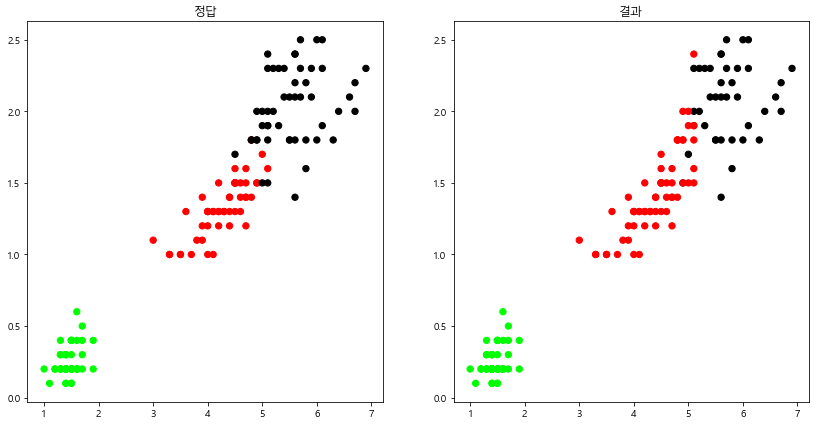

In [116]:
plt.figure(figsize = (14,7))
colormap = np.array(['lime', 'red','black'])


plt.subplot(1,2, 1)
plt.scatter(X.petal_length, X.petal_width, c = colormap[y.target], s = 40)
plt.title('정답')


plt.subplot(1,2, 2)
plt.scatter(X.petal_length, X.petal_width, c = colormap[model.labels_], s = 40)
plt.title('결과')

In [117]:
accuracy_score(y, model.labels_)

0.8933333333333333

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [125]:
# 사람의 키와 몸무게
df = pd.DataFrame(columns = ['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,64]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]# ... 가능?

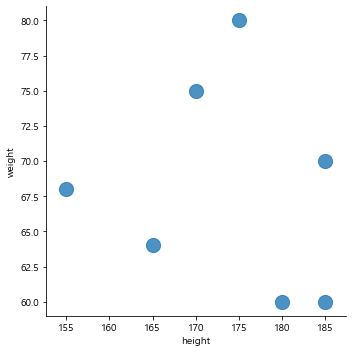

In [126]:
sns.lmplot('height', 'weight', data = df, fit_reg = False, scatter_kws = {'s':200})

In [127]:
model = KMeans(n_clusters=3).fit(df.values)

In [128]:
df['label'] = model.labels_
df

,height,weight,label
0,185,60,1
1,180,60,1
2,185,70,1
3,165,64,0
4,155,68,0
5,170,75,2
6,175,80,2


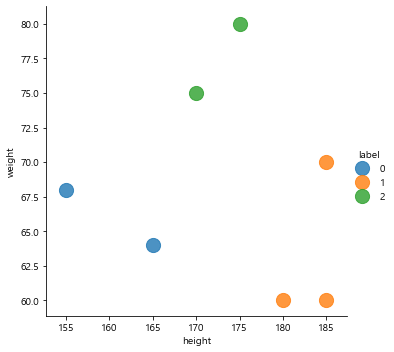

In [129]:
sns.lmplot('height', 'weight', data = df, fit_reg = False, scatter_kws = {'s':200}, hue = 'label')